# MOBILE PLAN REVENUE ANALYSIS

## Introduction

The purpose of this project is to provide conclusive data determining which prepaid plan, surf or ultimate, brings in more revenue. We are going to carry out a preliminary analysis of the plans based on a relatively small client selection by analyzing clients' behavior and details: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.

### Contents

- Introduction
- Initialization
- Data preprocessing
    - Missing values
    - Correct data types
    - Merging dataframes
- Data exploration
    - Plot histograms for calls, messages and internet usage
    - Plot bar charts for both plans
- Testing the hypotheses
    - The average revenue from users of Ultimate and Surf calling plans differs
    - The average revenue from users in NY-NJ area is different from that of the users from other regions
- General Conclusion

## Initialization

Loading necessary libraries

In [1]:
# loading the pandas library
import pandas as pd

In [2]:
# loading the math library
import math

In [3]:
# Loading matplotlib library
import matplotlib.pyplot as plt

In [4]:
# loading the numpy library
import numpy as np

In [5]:
# Loading the scipy library
from scipy import stats as st

Loading the data files

In [6]:
# Load the data file into a DataFrame
megaline_user_data = pd.read_csv('/datasets/megaline_users.csv')

In [7]:
# Load the data file into a DataFrame
megaline_call_data = pd.read_csv('/datasets/megaline_calls.csv')

In [8]:
# Load the data file into a DataFrame
megaline_msg_data = pd.read_csv('/datasets/megaline_messages.csv')

In [9]:
# Load the data file into a DataFrame
megaline_internet_data = pd.read_csv('/datasets/megaline_internet.csv')

In [10]:
# Load the data file into a DataFrame
megaline_plan_data = pd.read_csv('/datasets/megaline_plans.csv')

Set float format of dataframes to 3 decimal places

In [11]:
# This function changes the display of float values in the data to 3 decimal places    
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Preprocessing

### Changing data type in analysis datasets

Load basic information of the call dataset

In [12]:
# basic info of call dataset
megaline_call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# sample of call dataset
megaline_call_data.sample()

,id,user_id,call_date,duration
71015,1252_467,1252,2018-10-04,17.340


Per the output, we need to change the data type of the `'call_date'` column to dateTime

In [14]:
# changing data type to datetime
megaline_call_data['call_date'] = pd.to_datetime(megaline_call_data['call_date'], format = '%Y-%m-%d')

In [15]:
# showing changes to data type
megaline_call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


We also need to set the `'month'` column in the call dataframe as the analysis is done on data per month

In [16]:
# set month data in a column
megaline_call_data['month'] = pd.DatetimeIndex(megaline_call_data['call_date']).month

Now onto the text message dataset

In [17]:
# general info on message dataset
megaline_msg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# sample of message dataset
megaline_msg_data.sample()

,id,user_id,message_date
37784,1250_37,1250,2018-12-31


Changing data type of `'message_date'` column to dateTime

In [19]:
# changing data type to datetime
megaline_msg_data['message_date'] = pd.to_datetime(megaline_msg_data['message_date'], format = '%Y-%m-%d')

In [20]:
# result of datatype change
megaline_msg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
# month column for message dataframe
megaline_msg_data['month'] = pd.DatetimeIndex(megaline_msg_data['message_date']).month

Moving on to the internet data

In [22]:
# general info
megaline_internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# sample data
megaline_internet_data.sample()

,id,user_id,session_date,mb_used
93982,1439_35,1439,2018-08-24,0.000


In [24]:
# changing data type to datetime
megaline_internet_data['session_date'] = pd.to_datetime(megaline_internet_data['session_date'], format = '%Y-%m-%d')

In [25]:
# result of data type change
megaline_internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [26]:
# month column for internet data
megaline_internet_data['month'] = pd.DatetimeIndex(megaline_internet_data['session_date']).month

### Handling Missing Values in User Data and Changing Data Type

Now that the analysis dataframes have been configured, we can move on to the plan and user dataframes

In [27]:
# general info on plan data
megaline_plan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [28]:
# general info on user data
megaline_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [29]:
# percent of missing data
megaline_user_data['churn_date'].isna().sum() / len(megaline_user_data) * 100

93.2

From the outputs above, there are missing values in the `'churn_date'` column which need to be fixed as over 90% of the dataframe is affected. Since the churn date represents the last day the plan was used by the user and the data represented records data for 2018, we can use a wrong date to fill the missing values to avoid confusions, in this case 2222-11-11.

In [30]:
#fill missing values in churn date column
megaline_user_data['churn_date'].fillna('2222-11-11', inplace = True)

In [31]:
# check to see if filled
megaline_user_data['churn_date'].isna().sum()

0

Now that the missing values are filled, we can change the data type for the respective date time columns

In [32]:
# changing data type to datetime
megaline_user_data['churn_date'] = pd.to_datetime(megaline_user_data['churn_date'], format = '%Y-%m-%d')

In [33]:
# changing data type to datetime
megaline_user_data['reg_date'] = pd.to_datetime(megaline_user_data['reg_date'], format = '%Y-%m-%d')

In [34]:
# result of data type change
megaline_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Merging Dataframes

To perform accurate analysis on the data provided, we need to merge the different dataframes to `'megaline_user_data'` by plan and month

To do this, we will create pivot tables of message count, call time and internet usage monthly for integration of the calculated values with the `'megaline_user_data'` dataframe

In [35]:
# pivot table of message count per month
msg_table = megaline_msg_data.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count').reset_index()
msg_table

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [36]:
# pivot table of internet usage per month
internet_table = megaline_internet_data.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum').reset_index()
internet_table

,user_id,month,mb_used
0,1000,12,1901.470
1,1001,8,6919.150
2,1001,9,13314.820
3,1001,10,22330.490
4,1001,11,18504.300
...,...,...,...
2272,1498,12,23137.690
2273,1499,9,12984.760
2274,1499,10,19492.430
2275,1499,11,16813.830


In [37]:
# pivot table of call count and total call time monthly
call_table = megaline_call_data.pivot_table(index= ['user_id','month'], values= 'duration', aggfunc = ('count', 'sum')).reset_index()
call_table

,user_id,month,count,sum
0,1000,12,16,116.830
1,1001,8,27,171.140
2,1001,9,49,297.690
3,1001,10,65,374.110
4,1001,11,64,404.590
...,...,...,...,...
2253,1498,12,39,324.770
2254,1499,9,41,330.370
2255,1499,10,53,363.280
2256,1499,11,45,288.560


We can then merge the tables to the user dataframe

In [38]:
# merge call data table to megaline_user_data
megaline_user_data = megaline_user_data.merge(call_table, on = 'user_id')
megaline_user_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,count,sum
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2222-11-11,12,16,116.830
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,8,27,171.140
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,9,49,297.690
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,10,65,374.110
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,11,64,404.590
...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2222-11-11,12,39,324.770
2254,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,9,41,330.370
2255,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,10,53,363.280
2256,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,11,45,288.560


In [39]:
# chedcking number of unique users after merge
megaline_user_data['user_id'].nunique()

481

In [40]:
# merge nessage data table to megaline_user_data
megaline_user_data = megaline_user_data.merge(msg_table, on = ['user_id', 'month'], how = 'left')
megaline_user_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,count,sum,id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2222-11-11,12,16,116.830,11.000
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,8,27,171.140,30.000
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,9,49,297.690,44.000
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,10,65,374.110,53.000
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,11,64,404.590,36.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2222-11-11,12,39,324.770,NaN
2254,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,9,41,330.370,NaN
2255,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,10,53,363.280,NaN
2256,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,11,45,288.560,NaN


In [41]:
# checking number of unique users after merge
megaline_user_data['user_id'].nunique()

481

In [42]:
# merge internet usage table to megaline_user_data
megaline_user_data = megaline_user_data.merge(internet_table, on = ['user_id','month'], how = 'left')
megaline_user_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,count,sum,id,mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2222-11-11,12,16,116.830,11.000,1901.470
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,8,27,171.140,30.000,6919.150
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,9,49,297.690,44.000,13314.820
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,10,65,374.110,53.000,22330.490
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,11,64,404.590,36.000,18504.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2222-11-11,12,39,324.770,NaN,23137.690
2254,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,9,41,330.370,NaN,12984.760
2255,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,10,53,363.280,NaN,19492.430
2256,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,11,45,288.560,NaN,16813.830


In [43]:
# checking number of unique users after merge
megaline_user_data['user_id'].nunique()

481

In [44]:
# result of merge
megaline_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2258 non-null   int64         
 1   first_name  2258 non-null   object        
 2   last_name   2258 non-null   object        
 3   age         2258 non-null   int64         
 4   city        2258 non-null   object        
 5   reg_date    2258 non-null   datetime64[ns]
 6   plan        2258 non-null   object        
 7   churn_date  2258 non-null   datetime64[ns]
 8   month       2258 non-null   int64         
 9   count       2258 non-null   int64         
 10  sum         2258 non-null   float64       
 11  id          1773 non-null   float64       
 12  mb_used     2243 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(4)
memory usage: 247.0+ KB


As shown above, there are missing values in both the `'id'` and `'mb_used'` columns. Three column names are also unclear so we need to rename therm for clarity.

In [45]:
# renaming columns
megaline_user_data = megaline_user_data.rename(columns = {'count':'call_count','sum':'call_time','id': 'msg_count',})

In [46]:
# checking for missing values
megaline_user_data.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date      0
month           0
call_count      0
call_time       0
msg_count     485
mb_used        15
dtype: int64

For the missing values, we can replace the values with 0 as it is possible no messages were sent or internet used by the represented users during the months recorded.

In [47]:
# fill missing values
megaline_user_data.fillna(0, inplace = True)

In [48]:
# check to see if filled
megaline_user_data.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
month         0
call_count    0
call_time     0
msg_count     0
mb_used       0
dtype: int64

In [49]:
# view plan dataframe
megaline_plan_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.030,0.030,surf
1,1000,30720,3000,70,7,0.010,0.010,ultimate


In order to calculate revenue based on call time, message count and internet usage monthly for each user per plan, we would merge both dataframes together

In [50]:
# merge plan datafram for revenue calculation
megaline_user_data = megaline_user_data.merge(megaline_plan_data, left_on = 'plan', right_on = 'plan_name', how = 'left')

In [51]:
megaline_user_data.user_id.nunique()

481

In [52]:
# function to calculate revenue
def fill_rev(row):
    calld = 0
    msgd = 0
    mbd = 0
    msgd = row['msg_count'] - row['messages_included']
    mbd = math.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) # round up mb used
    calld = math.ceil(row['call_time'] - row['minutes_included']) # round up call time
    if msgd <= 0:
        msgd = 0
    if mbd <= 0:
        mbd = 0
    if calld <= 0:
        calld = 0
    return (row['usd_per_message'] * msgd) + (row['usd_per_gb'] * mbd) + (row['usd_per_minute'] * calld) + row['usd_monthly_pay']

In [53]:
# test function
rowa = megaline_user_data.loc[0]
fill_rev(rowa)

70.0

In [54]:
# apply function to dataframe
megaline_user_data['revenue'] = megaline_user_data.apply(fill_rev, axis = 1)

In [55]:
# view resultant dataframe
megaline_user_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,call_count,...,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2222-11-11,12,16,...,1901.470,1000,30720,3000,70,7,0.010,0.010,ultimate,70.000
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,8,27,...,6919.150,50,15360,500,20,10,0.030,0.030,surf,20.000
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,9,49,...,13314.820,50,15360,500,20,10,0.030,0.030,surf,20.000
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,10,65,...,22330.490,50,15360,500,20,10,0.030,0.030,surf,90.090
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2222-11-11,11,64,...,18504.300,50,15360,500,20,10,0.030,0.030,surf,60.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2222-11-11,12,39,...,23137.690,50,15360,500,20,10,0.030,0.030,surf,100.000
2254,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,9,41,...,12984.760,50,15360,500,20,10,0.030,0.030,surf,20.000
2255,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,10,53,...,19492.430,50,15360,500,20,10,0.030,0.030,surf,70.000
2256,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2222-11-11,11,45,...,16813.830,50,15360,500,20,10,0.030,0.030,surf,40.000


In [56]:
# statistics for revenue column
megaline_user_data['revenue'].describe()

count   2258.000
mean      63.702
std       45.002
min       20.000
25%       22.663
50%       70.000
75%       70.000
max      588.660
Name: revenue, dtype: float64

## Data Exploration

Now that the dataframes have been cleaned and merged, we can look deeper into the individual factors - call time, message count, internet usage - to further analysis on the most profitable data plan.

In [57]:
# pivot table of call time monthly per plan
call_per_plan = megaline_user_data.pivot_table(index = 'month', columns = 'plan', values = 'call_time')

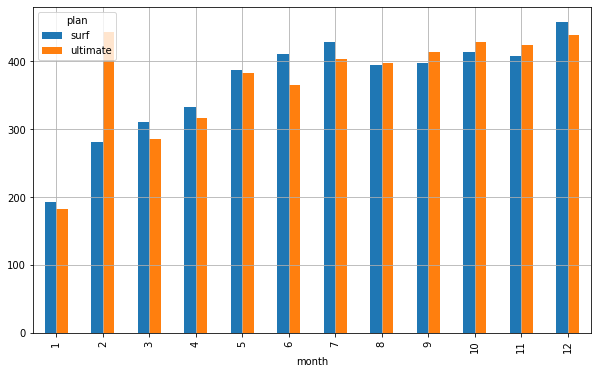

In [58]:
# bar chart showing call data for both plans 
call_per_plan.plot(kind = 'bar', figsize = (10,6), grid = True)
plt.show()

In the figure above, both plans show the same frequency of higher call times in comparison to the other with regards to the number of months. The longest call time is however attributed to the Surf plan in December, while the shortest is attributed to the Ultimate plan in January. The figure also shows an large call time frequency for Ultimate users in February.

Below is a table showing statistical values - mean, variance and standard deviation- for call minutes monthly per plan

In [59]:
#statistics of call data
call_dist = megaline_user_data.groupby(['plan','month'])['call_time'].agg(['mean','var','std'])
call_dist

mean       var     std
plan     month                          
surf     1     192.840 14795.440 121.637
         2     280.851 46959.220 216.701
         3     310.970 31821.318 178.385
         4     332.380 45615.667 213.578
         5     387.108 50778.127 225.340
         6     411.451 39424.054 198.555
         7     428.061 53364.540 231.008
         8     394.475 46639.241 215.961
         9     397.133 39785.303 199.463
         10    414.436 44103.682 210.009
         11    408.255 43560.875 208.712
         12    457.547 53646.782 231.618
ultimate 1     183.162 14991.370 122.439
         2     443.172 48579.582 220.408
         3     285.702 54273.917 232.968
         4     316.508 31057.727 176.232
         5     383.665 39290.611 198.219
         6     365.358 33837.770 183.950
         7     403.767 64844.427 254.646
         8     397.275 47680.189 218.358
         9     413.287 50994.506 225.820
         10    429.217 47081.624 216.983
         11    423.815 53273.637 230.811
         12    438.825 53967.732 232.310

We will plot histograms per plan showing the frequency of call minutes

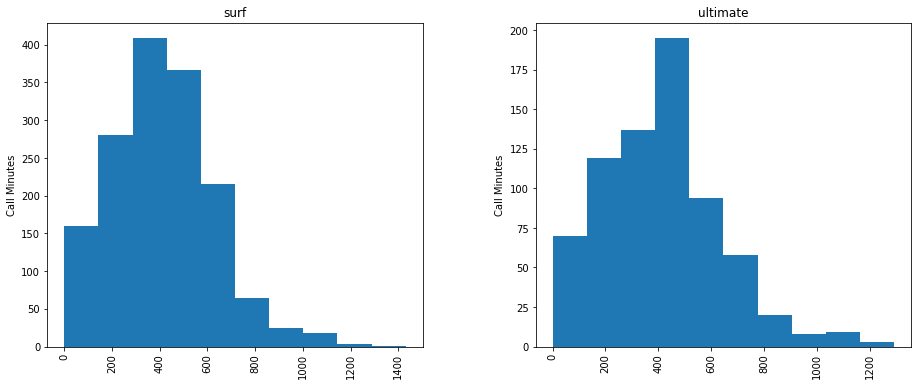

In [60]:
# histogram of call time per plan
plots = megaline_user_data.hist('call_time',by = 'plan', figsize = (15,6))
for ax in plots.flatten():
    ax.set_ylabel('Call Minutes')
plt.show()


Per the graph above, Surf users mostly spend about 300 minutes making calls while Ultimate users spend about 500 minutes for calls.

Moving on to the analysis of message count per plan

In [61]:
# pivot table of monthly message count per plan
msg_per_plan = megaline_user_data.pivot_table(index = 'month', columns = 'plan', values = 'msg_count')

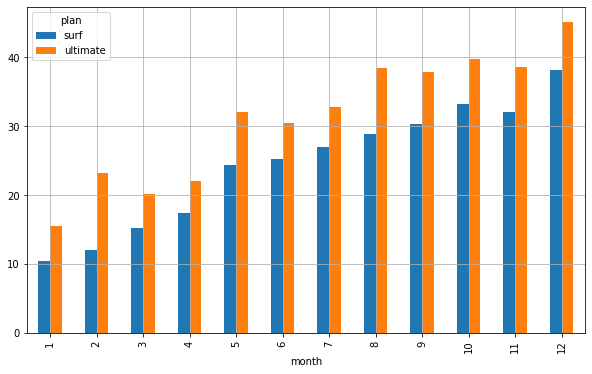

In [62]:
# bar chart of message count for both plans
msg_per_plan.plot(kind = 'bar', figsize = (10,6), grid = True)
plt.show()

Compared to the previous bar chart for call time data, Ultimate plan users amass more message counts than Surf plan users. The highest data attributed to December and the lowest to January.

In [63]:
# statistics table for message count
msg_dist = megaline_user_data.groupby(['plan','month'])['msg_count'].agg(['mean','var','std'])
msg_dist

mean      var    std
plan     month                       
surf     1     10.500  220.500 14.849
         2     12.000  386.000 19.647
         3     15.261  346.565 18.616
         4     17.400  501.592 22.396
         5     24.387  862.916 29.375
         6     25.281  924.520 30.406
         7     27.025  931.672 30.523
         8     28.855 1046.681 32.352
         9     30.377 1002.826 31.667
         10    33.267 1278.707 35.759
         11    32.116 1070.697 32.722
         12    38.212 1474.206 38.395
ultimate 1     15.500  313.667 17.711
         2     23.167  552.567 23.507
         3     20.250  654.386 25.581
         4     22.048  544.148 23.327
         5     32.103 1297.310 36.018
         6     30.533  862.118 29.362
         7     32.831  960.488 30.992
         8     38.479 1196.367 34.589
         9     37.895 1050.918 32.418
         10    39.800 1219.238 34.918
         11    38.579 1242.438 35.248
         12    45.087 1549.310 39.361

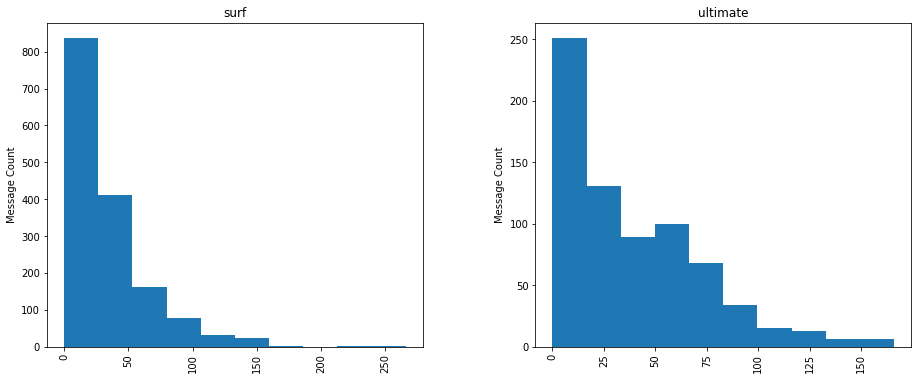

In [64]:
# histogram of message count per plan
plotsb = megaline_user_data.hist('msg_count', by = 'plan', figsize = (15,6))
for ax in plotsb.flatten():
    ax.set_ylabel('Message Count')
plt.show()


The graphs above are similar in that more users send about 0 - 20 messages regardless of the plan. There are also obvious outliers in the Surf histogram with message counts between 210 and 260.

Finally, analysis on internet usage per plan

In [65]:
# pivot table of monthly internet usage per plan
mb_per_plan = megaline_user_data.pivot_table(index = 'month', columns = 'plan', values = 'mb_used')

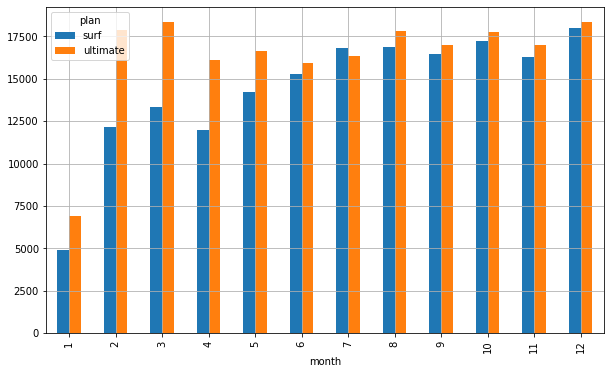

In [66]:
# bar chart of internet usage for both plans
mb_per_plan.plot(kind = 'bar', figsize = (10,6), grid = True)
plt.show()

In the graph above, the most internet usage is shown for Ultimate plan users in March while the lowest is for January.

In [67]:
# statistics for internet usage monthly per plan
mb_dist = megaline_user_data.groupby(['plan','month'])['mb_used'].agg(['mean','var','std'])
mb_dist

mean           var       std
plan     month                                  
surf     1      4874.860  18239954.410  4270.826
         2     12178.843  43672958.907  6608.552
         3     13345.440  68245557.531  8261.087
         4     11984.203  59044940.655  7684.071
         5     14201.487  60229678.630  7760.778
         6     15308.451  49645886.757  7045.984
         7     16785.430  65229723.696  8076.492
         8     16870.108  75052245.655  8663.270
         9     16441.598  49424797.955  7030.277
         10    17240.075  61679542.851  7853.632
         11    16290.384  53301526.188  7300.789
         12    17980.815  64881904.542  8054.930
ultimate 1      6918.092  16394711.894  4049.038
         2     17884.958  40376110.953  6354.220
         3     18321.518 140339165.297 11846.483
         4     16121.655  88428607.065  9403.649
         5     16624.482  56790115.888  7535.922
         6     15920.383  67109590.411  8192.044
         7     16344.744  68419210.682  8271.591
         8     17814.720  60447083.748  7774.772
         9     16969.870  49339038.238  7024.175
         10    17780.292  54532189.672  7384.591
         11    16999.453  57900178.341  7609.217
         12    18321.065  58217116.139  7630.014

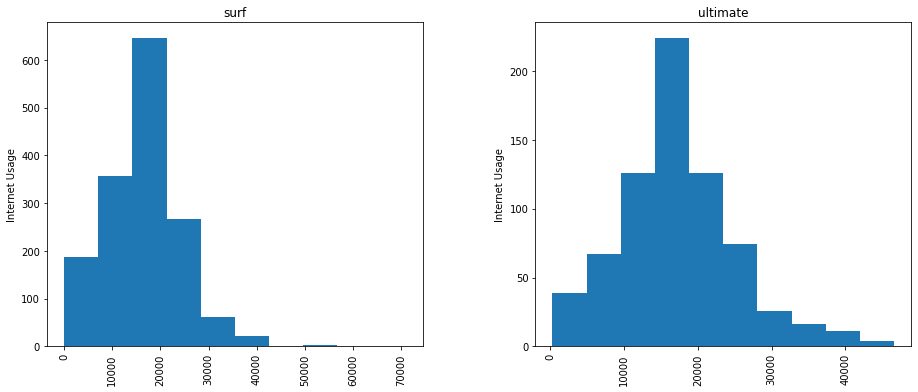

In [68]:
# histogram of internet usage per plan
plotsc = megaline_user_data.hist('mb_used', by = 'plan', figsize = (15,6))
for ax in plotsc.flatten():
    ax.set_ylabel('Internet Usage')
plt.show()


For both plans, users tend to use about 15,000 to 20,000 MB of data as shown in the graph above. The graph for Surf skews more to the left than that of Ultimate which skews more to the right showing higher MBs used.

Below is a table showing overall statistical values - mean, variance and standard deviation- for offered services per plan

In [69]:
# statistics for the entire data per plan
megaline_user_data.pivot_table( index = 'plan', values = ['call_time', 'msg_count', 'mb_used'], aggfunc = ('mean','var','std'))

call_time                     mb_used                        \
              mean     std       var      mean      std          var   
plan                                                                   
surf       412.098 216.798 47001.254 16505.727 7847.816 61588219.761   
ultimate   410.181 224.746 50510.632 17278.004 7759.655 60212248.305   

         msg_count                  
              mean    std      var  
plan                                
surf        30.898 33.644 1131.949  
ultimate    37.725 34.787 1210.143

## Testing the Hypotheses

### The average revenue from users of Ultimate and Surf calling plans differs

In [70]:
# testing hypotheses
surf_rev = megaline_user_data[megaline_user_data['plan'] == 'surf']['revenue']
ult_rev = megaline_user_data[megaline_user_data['plan'] == 'ultimate']['revenue']
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_rev, ult_rev)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.596684931934826e-10
We reject the null hypothesis


The result gotten from the test above shows that we reject the null hypothesis as the mean revenue of both plans differs.

H0: The average revenue from users of Ultimate and Surf calling plans is equal.

H1: The average revenue from users of Ultimate and Surf calling plans differs.

In [71]:
# pivot table showing mean and sum of revenue per plan
total_rev = megaline_user_data.pivot_table(index = 'plan', values = 'revenue', aggfunc = ('mean','sum'))
total_rev

,mean,sum
plan,,
surf,59.744,92304.870
ultimate,72.278,51534.000


As shown above, though the mean revenue is lower in Surf plan, the total revenue is higher than that of the Ultimate plan

### The average revenue from users in NY-NJ area is different from that of the users from other regions

In [72]:
# filter data for just NY-NJ
NY_NJ_data = megaline_user_data[megaline_user_data['city'].str.contains('NY-NJ')]

In [73]:
# Table without data for NY-NJ
other_city_data = megaline_user_data[~(megaline_user_data['city'].str.contains('NY-NJ'))]

In [74]:
# Testing the hypotheses
NY_city_value = NY_NJ_data['revenue'].mean()
city_data = other_city_data['revenue']

alpha = 0.05  # critical statistical significance level

results = st.ttest_1samp(city_data, NY_city_value)

# 
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  4.385277525374623e-09
We reject the null hypothesis


For the result of the test above, we reject the null hypothesis which means the average revenues between NY-NJ city and the other represented cities differs.

H0: The average revenue from users in NY-NJ area and that of the users from other regions is equal.

H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.

## General Conclusion

For this project we worked with multiple datasets to analyze the most profitable prepaid plan between Surf and Ultimate.
There was not much cleaning to be done to the data other than filling in the missing values for the `'churn date'`column. 
This was done by setting all NaN values to the date 2019-01-01 as the data represented was that of the year 2018.

The tables had to be merged to show call minutes data, message count data and internet usage data monthly based on the plans for all users represented. We used this information to determine monthly revenue for each plan.

Based on the bar charts for call minutes, Surf users mostly spend about 300 minutes making calls while Ultimate users spend about 500 minutes for calls. The longest call time is however attributed to the Surf plan, while the shortest is attributed to the Ultimate plan.

For message count, Ultimate plan users amassed more message counts than Surf plan users most likely due to the higher count for free messages under the plan.

And for internet usage, for both plans, users tend to use about 15,000 to 20,000 MB of data as shown in the graph above. The graph for Surf skews more to the left than that of Ultimate which skews more to the right showing higher MBs used. The most internet usage is shown for Ultimate plan users.

With regards to the revenue for both plans, the average revenue monthly was higher in the Ultimate plan compared to the Surf plan, though the difference was not really significant since the monthly costs for Surf is 20 USD with a mean of about 60 USD and the monthly cost for Ultimate is 70 USD with a mean of about 72 USD. This is also proven by the higher total revenue associated with the Surf plan.

The Surf plan therefore yields more revenue for the company.

For the second hypotheses regarding the difference between average revenue in NY-NJ city and the other represented cities, we rejected the null hypotheses because the tested means differ from each other.